#Final Exam Fall 2024

##Task 1: Combine CSV Files into a Single DataFrame

In [8]:
# Unzip the file
import zipfile
import os

In [9]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
zip_path = r"/content/drive/MyDrive/Final exam/data/data.zip"
extract_dir = r"/content/drive/MyDrive/Final exam/data"

In [11]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files to verify
print(os.listdir(extract_dir))

['data.zip', 'Maize.csv', 'Tomatoes.csv', 'Beans (dry).csv', 'Oranges (big size).csv', 'Peas (fresh).csv', 'Chili (red).csv', 'Sorghum.csv', 'Potatoes (Irish).csv', 'Cassava.csv', 'data', '__MACOSX']


In [12]:
import pandas as pd
import os

In [13]:
# Path to the folder containing the CSV files
folder_path = r"/content/drive/MyDrive/Final exam/Data/Zip file/data"

In [16]:
# Path to the folder containing the CSV files - updated path
folder_path = r"/content/drive/MyDrive/Final exam/data"
# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Loop through each file to inspect its columns and the first few rows
for file in csv_files:
    print(f"Inspecting file: {file}")
    file_path = os.path.join(folder_path, file)

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Print column names and a sample of the data
    print("Columns:", df.columns)
    print(df.head(), "\n")

Inspecting file: Maize.csv
Columns: Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')
   adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  cm_id  \
0      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo     51   
1      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo     51   
2      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo     51   
3      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo     51   
4      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo     51   

  cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  mp_year  \
0   Maize      77      RWF     15  Retail      5      KG        11     2010   
1   Maize      77      RWF     15  Retail      5      KG        12     2010   

In [17]:
# Initialize an empty dictionary to store cleaned and consolidated DataFrames
consolidated_dataframes = {}

# Process each CSV file
for file in csv_files:
    print(f"Processing file: {file}")
    file_path = os.path.join(folder_path, file)

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Step 1: Keep only the relevant columns
    df = df[['mp_year', 'mp_month', 'mp_price']]

    # Step 2: Group by 'mp_year' and 'mp_month', and aggregate 'mp_price'
    df = df.groupby(['mp_year', 'mp_month'], as_index=False).agg({'mp_price': 'mean'})

    # Step 3: Save the cleaned and consolidated DataFrame to the dictionary
    consolidated_dataframes[file.replace('.csv', '').strip()] = df

    # Save each cleaned DataFrame to a new CSV file (optional)
    output_path = os.path.join(folder_path, f"cleaned_{file}")
    df.to_csv(output_path, index=False)

    # Print a sample of the consolidated DataFrame
    print(f"Consolidated DataFrame for {file}:")
    print(df.head(), "\n")

Processing file: Maize.csv
Consolidated DataFrame for Maize.csv:
   mp_year  mp_month    mp_price
0     2008         1  176.174242
1     2008         2  157.460938
2     2008         3  145.820312
3     2008         4  160.898438
4     2008         5  158.040323 

Processing file: Tomatoes.csv
Consolidated DataFrame for Tomatoes.csv:
   mp_year  mp_month    mp_price
0     2012         1  307.993524
1     2012         2  405.357463
2     2012         3  463.865029
3     2012         4  448.533915
4     2012         5  469.490286 

Processing file: Beans (dry).csv
Consolidated DataFrame for Beans (dry).csv:
   mp_year  mp_month    mp_price
0     2008         1  272.348485
1     2008         2  257.045455
2     2008         3  272.500000
3     2008         4  282.159091
4     2008         5  284.015152 

Processing file: Oranges (big size).csv
Consolidated DataFrame for Oranges (big size).csv:
   mp_year  mp_month    mp_price
0     2012         1  588.338306
1     2012         2  613.5071

In [18]:
# Check rows and columns for each cleaned DataFrame
for good, df in consolidated_dataframes.items():
    print(f"{good}: {df.shape[0]} rows, {df.shape[1]} columns")


Maize: 96 rows, 3 columns
Tomatoes: 38 rows, 3 columns
Beans (dry): 96 rows, 3 columns
Oranges (big size): 38 rows, 3 columns
Peas (fresh): 60 rows, 3 columns
Chili (red): 38 rows, 3 columns
Sorghum: 96 rows, 3 columns
Potatoes (Irish): 96 rows, 3 columns
Cassava: 96 rows, 3 columns


In [19]:
# Update each cleaned DataFrame to include a 'Date' column
for good, df in consolidated_dataframes.items():
    print(f"Processing {good}...")

    # Combine 'mp_year' and 'mp_month' into a 'Date' column
    df['Date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str) + '-01')

    # Drop the now-redundant 'mp_year' and 'mp_month' columns
    df.drop(columns=['mp_year', 'mp_month'], inplace=True)

    # Update the DataFrame in the dictionary
    consolidated_dataframes[good] = df

    # Print a sample of the updated DataFrame
    print(f"Updated DataFrame for {good}:")
    print(df.head(), "\n")

Processing Maize...
Updated DataFrame for Maize:
     mp_price       Date
0  176.174242 2008-01-01
1  157.460938 2008-02-01
2  145.820312 2008-03-01
3  160.898438 2008-04-01
4  158.040323 2008-05-01 

Processing Tomatoes...
Updated DataFrame for Tomatoes:
     mp_price       Date
0  307.993524 2012-01-01
1  405.357463 2012-02-01
2  463.865029 2012-03-01
3  448.533915 2012-04-01
4  469.490286 2012-05-01 

Processing Beans (dry)...
Updated DataFrame for Beans (dry):
     mp_price       Date
0  272.348485 2008-01-01
1  257.045455 2008-02-01
2  272.500000 2008-03-01
3  282.159091 2008-04-01
4  284.015152 2008-05-01 

Processing Oranges (big size)...
Updated DataFrame for Oranges (big size):
     mp_price       Date
0  588.338306 2012-01-01
1  613.507134 2012-02-01
2  555.678200 2012-03-01
3  478.481667 2012-04-01
4  412.980904 2012-05-01 

Processing Peas (fresh)...
Updated DataFrame for Peas (fresh):
     mp_price       Date
0  553.885886 2011-01-01
1  730.668226 2011-02-01
2  940.223515 

In [20]:
# Rename 'mp_price' in each cleaned DataFrame to the first word of the file name
for file, df in consolidated_dataframes.items():
    # Extract the first word from the file name
    good_name = file.split()[0]  # Gets the first word before a space
    df.rename(columns={'mp_price': good_name}, inplace=True)

    # Update the dictionary with the renamed DataFrame
    consolidated_dataframes[file] = df

    # Print to confirm the renaming
    print(f"Renamed column for {file}: {good_name}")
    print(df.head(), "\n")

Renamed column for Maize: Maize
        Maize       Date
0  176.174242 2008-01-01
1  157.460938 2008-02-01
2  145.820312 2008-03-01
3  160.898438 2008-04-01
4  158.040323 2008-05-01 

Renamed column for Tomatoes: Tomatoes
     Tomatoes       Date
0  307.993524 2012-01-01
1  405.357463 2012-02-01
2  463.865029 2012-03-01
3  448.533915 2012-04-01
4  469.490286 2012-05-01 

Renamed column for Beans (dry): Beans
        Beans       Date
0  272.348485 2008-01-01
1  257.045455 2008-02-01
2  272.500000 2008-03-01
3  282.159091 2008-04-01
4  284.015152 2008-05-01 

Renamed column for Oranges (big size): Oranges
      Oranges       Date
0  588.338306 2012-01-01
1  613.507134 2012-02-01
2  555.678200 2012-03-01
3  478.481667 2012-04-01
4  412.980904 2012-05-01 

Renamed column for Peas (fresh): Peas
         Peas       Date
0  553.885886 2011-01-01
1  730.668226 2011-02-01
2  940.223515 2011-03-01
3  722.213293 2011-04-01
4  594.845392 2011-05-01 

Renamed column for Chili (red): Chili
         

##Task 2: Explore the Consolidated Data

In [21]:
# Initialize the combined DataFrame
combined_df = None

# Loop through the cleaned DataFrames and merge them
for good, df in consolidated_dataframes.items():
    print(f"Merging {good} into the combined DataFrame...")

    if combined_df is None:
        # Start with the first DataFrame
        combined_df = df
    else:
        # Outer join on the 'Date' column
        combined_df = pd.merge(combined_df, df, on='Date', how='outer')

# Display the combined DataFrame
print("Combined DataFrame (Outer Join):")
print(combined_df.head())

Merging Maize into the combined DataFrame...
Merging Tomatoes into the combined DataFrame...
Merging Beans (dry) into the combined DataFrame...
Merging Oranges (big size) into the combined DataFrame...
Merging Peas (fresh) into the combined DataFrame...
Merging Chili (red) into the combined DataFrame...
Merging Sorghum into the combined DataFrame...
Merging Potatoes (Irish) into the combined DataFrame...
Merging Cassava into the combined DataFrame...
Combined DataFrame (Outer Join):
        Maize       Date  Tomatoes       Beans  Oranges  Peas  Chili  \
0  176.174242 2008-01-01       NaN  272.348485      NaN   NaN    NaN   
1  157.460938 2008-02-01       NaN  257.045455      NaN   NaN    NaN   
2  145.820312 2008-03-01       NaN  272.500000      NaN   NaN    NaN   
3  160.898438 2008-04-01       NaN  282.159091      NaN   NaN    NaN   
4  158.040323 2008-05-01       NaN  284.015152      NaN   NaN    NaN   

      Sorghum    Potatoes     Cassava  
0  178.554688   97.000000  138.194444  

In [22]:
# Display the number of rows and columns in the consolidated DataFrame
print(f"Number of rows: {combined_df.shape[0]}")
print(f"Number of columns: {combined_df.shape[1]}")

Number of rows: 96
Number of columns: 10


In [23]:
# Set 'Date' as the index
combined_df.set_index('Date', inplace=True)
print(combined_df)

                 Maize    Tomatoes       Beans     Oranges         Peas  \
Date                                                                      
2008-01-01  176.174242         NaN  272.348485         NaN          NaN   
2008-02-01  157.460938         NaN  257.045455         NaN          NaN   
2008-03-01  145.820312         NaN  272.500000         NaN          NaN   
2008-04-01  160.898438         NaN  282.159091         NaN          NaN   
2008-05-01  158.040323         NaN  284.015152         NaN          NaN   
...                ...         ...         ...         ...          ...   
2015-08-01  239.779426  372.943626  388.856805  685.692580   894.874974   
2015-09-01  251.107098  437.250974  405.965975  725.717308  1203.962659   
2015-10-01  248.519557  402.794936  418.106955  676.828331  1499.938600   
2015-11-01  276.936802  380.140961  448.042961  547.409525  1144.493695   
2015-12-01  298.876240  367.737436  466.655655  543.392900   836.926785   

                  Chili 

In [24]:
# 1. Display the shape of the DataFrame
print("DataFrame Shape (Rows, Columns):")
print(combined_df.shape)

# 2. List the column names and their respective data types
print("\nColumn Names and Data Types:")
print(combined_df.dtypes)

DataFrame Shape (Rows, Columns):
(96, 9)

Column Names and Data Types:
Maize       float64
Tomatoes    float64
Beans       float64
Oranges     float64
Peas        float64
Chili       float64
Sorghum     float64
Potatoes    float64
Cassava     float64
dtype: object


In [25]:
# 3. Verify the date range of the index
print("\nDate Range of the Index:")
print(f"Start Date: {combined_df.index.min()}")
print(f"End Date: {combined_df.index.max()}")


Date Range of the Index:
Start Date: 2008-01-01 00:00:00
End Date: 2015-12-01 00:00:00


In [26]:
# 4. Check if the date index is continuous
# Create a complete date range from start to end
full_date_range = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max(), freq='MS')

# Compare the generated date range with the DataFrame's index
missing_dates = full_date_range.difference(combined_df.index)

if missing_dates.empty:
    print("\nThe date index is continuous, with no missing months.")
else:
    print("\nThe following dates are missing from the index:")
    print(missing_dates)


The date index is continuous, with no missing months.


#Task 3: Handle Missing Values

In [27]:
# Calculate the total and percentage of missing values for each column
missing_values = combined_df.isnull().sum()
missing_percentage = (missing_values / len(combined_df)) * 100

# Summarize missing values into a DataFrame
missing_summary = pd.DataFrame({
    'Total Missing': missing_values,
    'Percentage Missing (%)': missing_percentage
}).sort_values(by='Percentage Missing (%)', ascending=False)

# Display the summary of missing values
print(missing_summary)

          Total Missing  Percentage Missing (%)
Tomatoes             58               60.416667
Oranges              58               60.416667
Chili                58               60.416667
Peas                 36               37.500000
Maize                 0                0.000000
Beans                 0                0.000000
Sorghum               0                0.000000
Potatoes              0                0.000000
Cassava               0                0.000000


#Task 4: Analyze Similarities Between Products

In [28]:
# Generate descriptive statistics for each column
descriptive_stats = combined_df.describe().T[['min', 'mean', '50%', 'max', 'std']]

# Rename '50%' to 'median' for clarity
descriptive_stats.rename(columns={'50%': 'median'}, inplace=True)

# Display the descriptive statistics
descriptive_stats

,min,mean,median,max,std
Maize,145.820312,227.949904,225.736949,335.986608,41.577013
Tomatoes,273.199820,376.446175,374.262788,469.490286,56.819252
Beans,219.697584,334.083819,327.908199,530.042987,64.789260
Oranges,412.980904,583.524695,582.115439,726.086930,77.458279
Peas,553.885886,922.292466,875.390358,1499.938600,228.328475
Chili,655.904309,1129.368683,1056.904008,1952.848602,306.620568
Sorghum,164.921875,275.130178,258.348848,388.809678,61.370135
Potatoes,97.000000,156.671755,150.377180,245.468424,35.260186
Cassava,130.102775,195.969790,204.739094,260.887844,35.205063


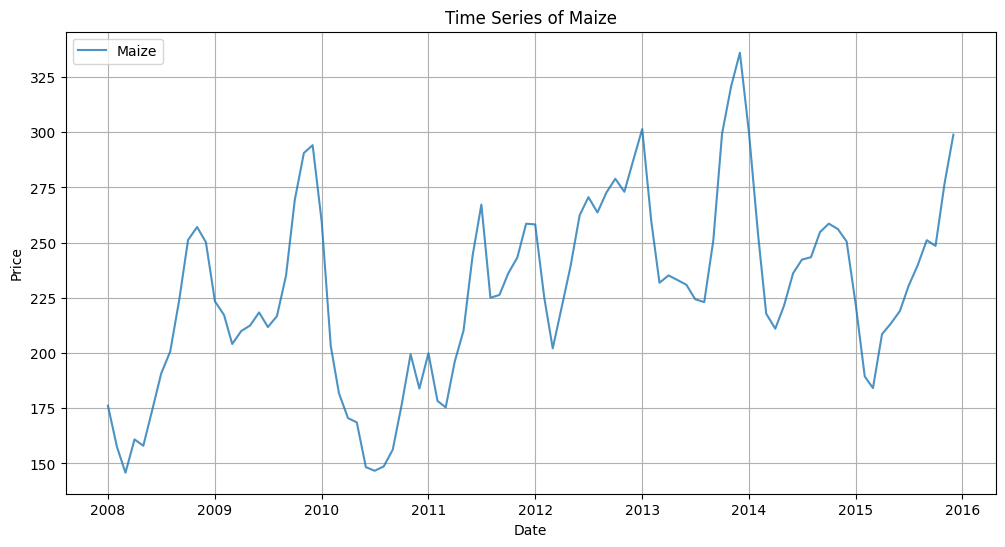

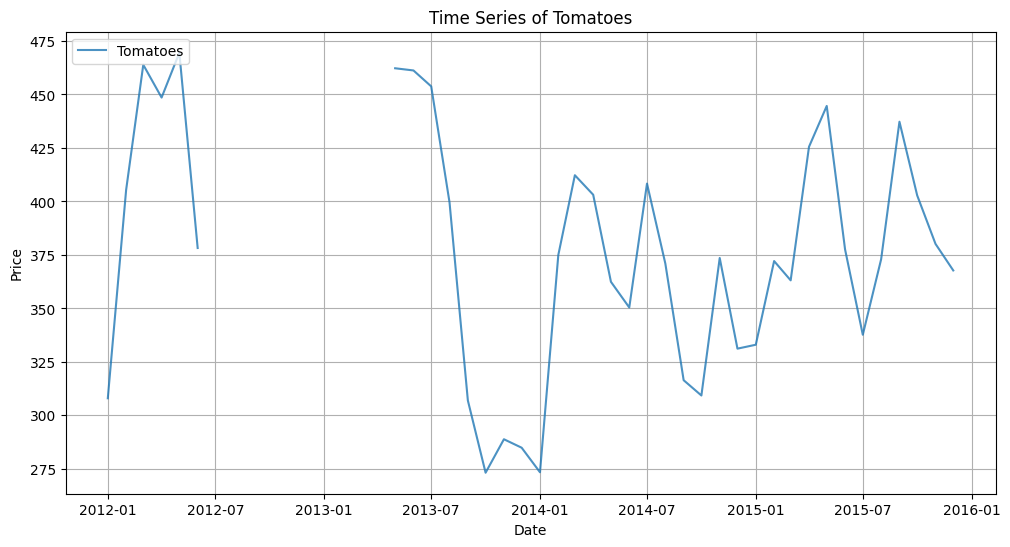

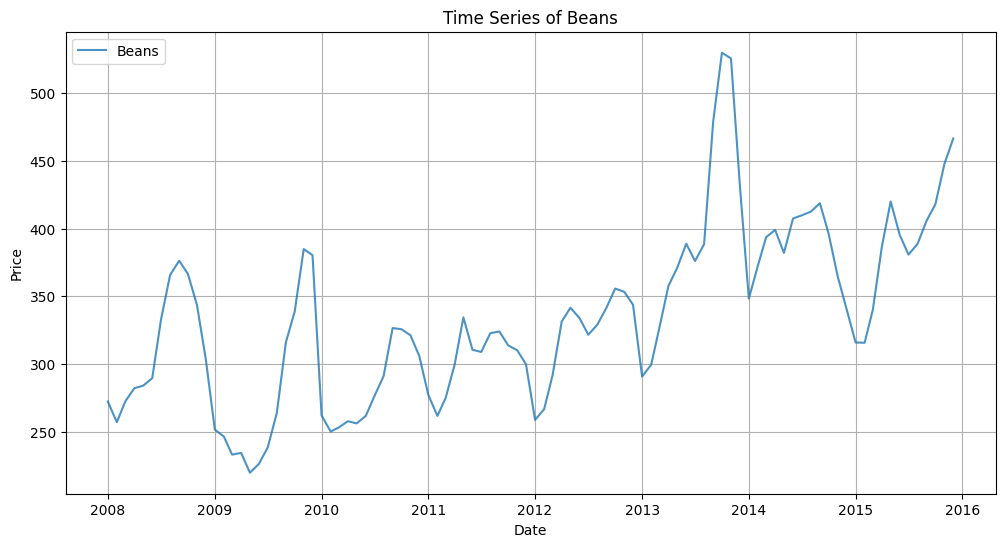

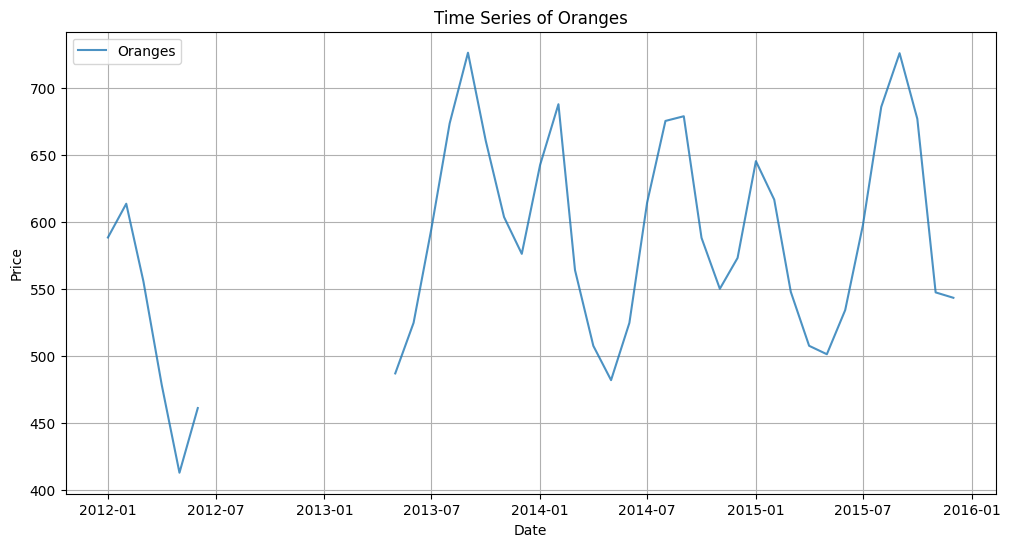

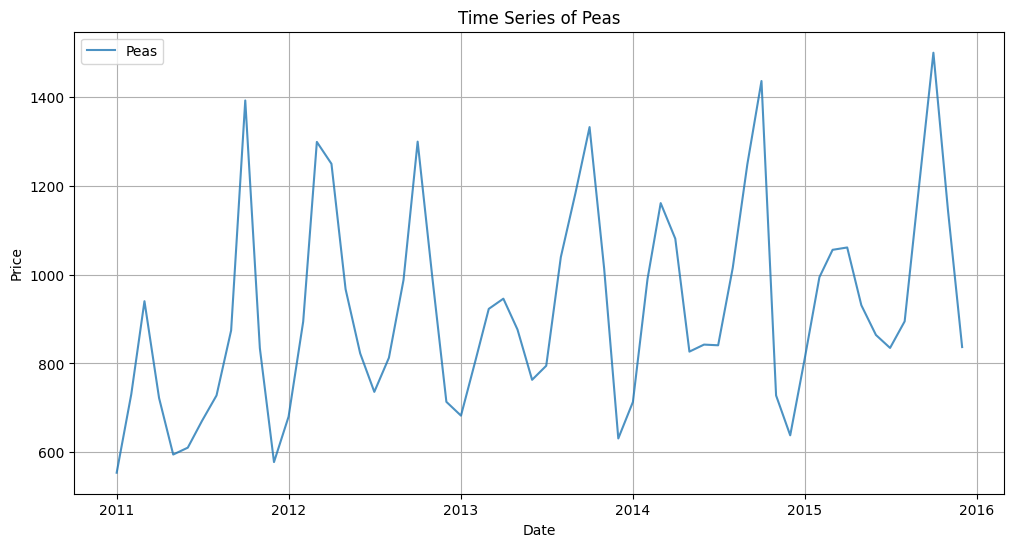

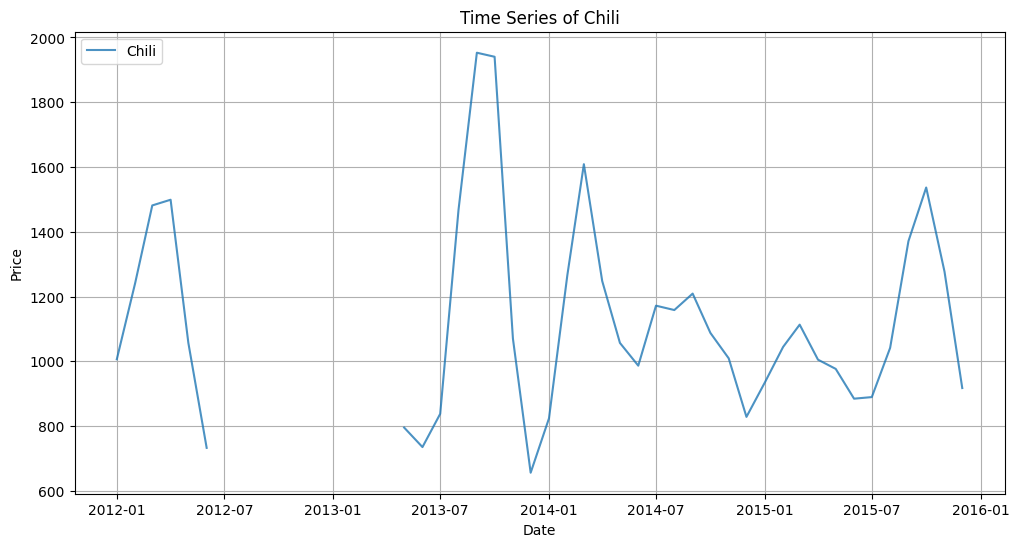

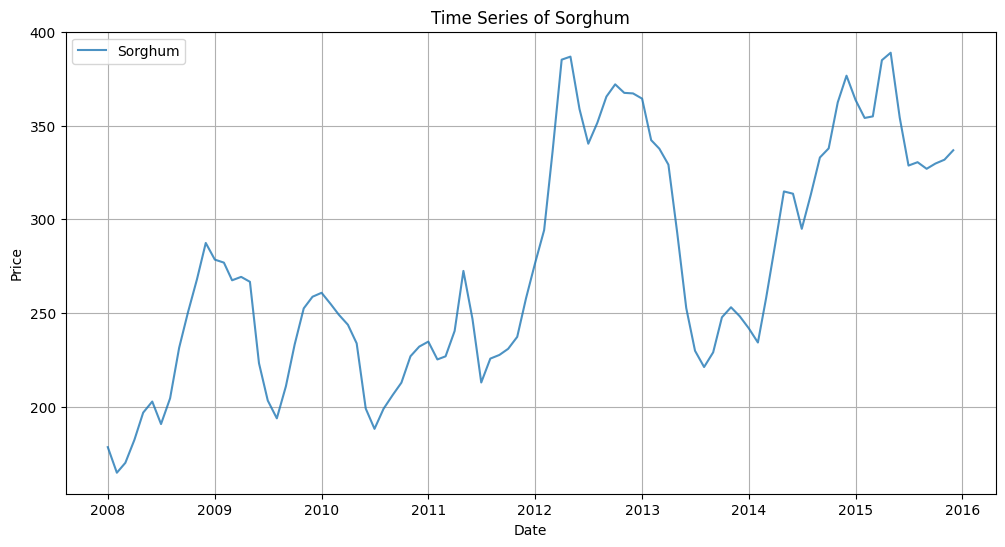

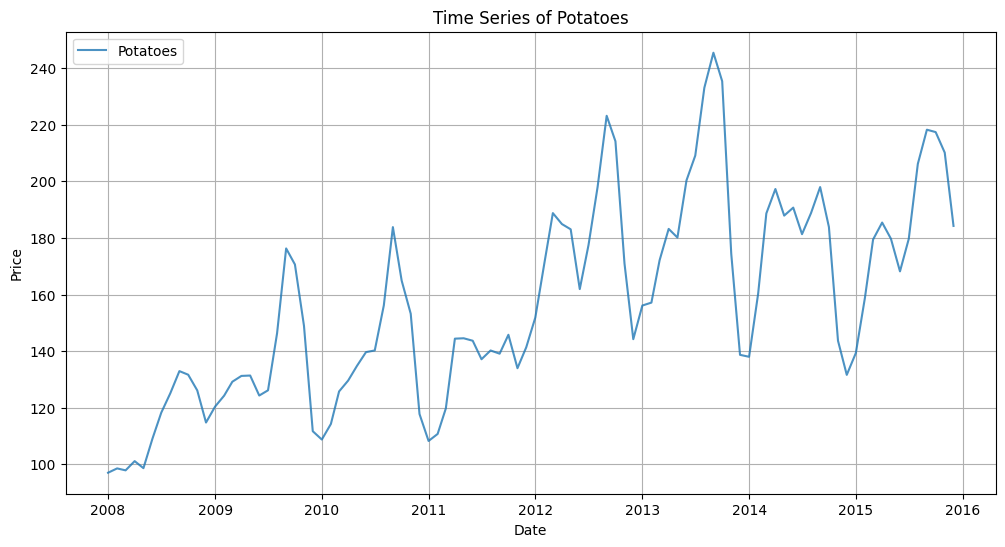

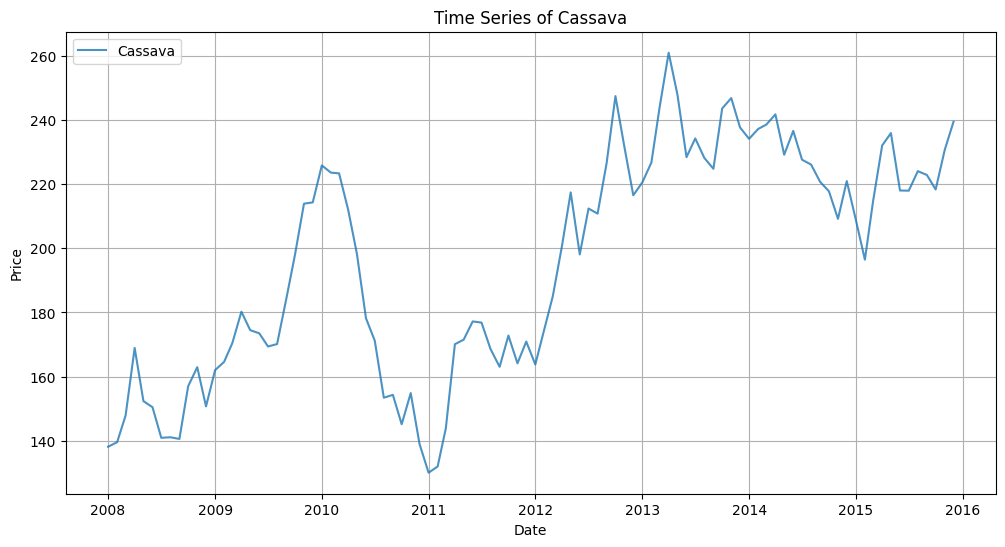

In [29]:
# Individual time series plots for each good
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and alias it as 'plt'

for good in combined_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df.index, combined_df[good], label=good, alpha=0.8)
    plt.title(f'Time Series of {good}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

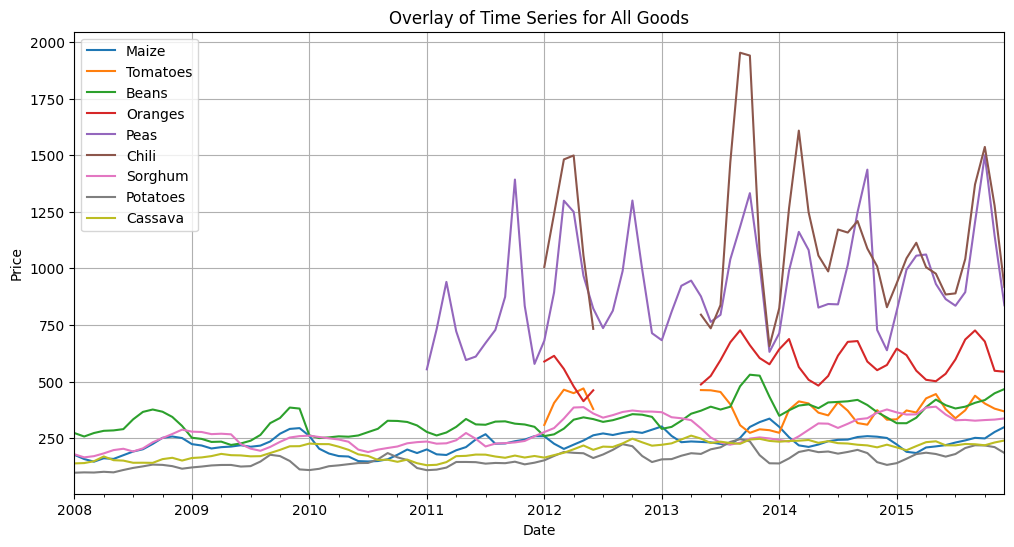

In [30]:
# Combined time series plot
combined_df.plot(figsize=(12, 6), title='Overlay of Time Series for All Goods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [31]:
# Identify columns with missing values and their total count
missing_columns = combined_df.isnull().sum()
missing_columns = missing_columns[missing_columns > 0]  # Filter only columns with missing values

# Display columns with missing values and their total count
print("Columns with Missing Values:")
print(missing_columns)


Columns with Missing Values:
Tomatoes    58
Oranges     58
Peas        36
Chili       58
dtype: int64


In [32]:
# Fill missing values using linear interpolation
combined_df.interpolate(method='linear', inplace=True)

# Verify if all missing values are filled
print("Missing values after interpolation:")
print(combined_df.isnull().sum())


Missing values after interpolation:
Maize        0
Tomatoes    48
Beans        0
Oranges     48
Peas        36
Chili       48
Sorghum      0
Potatoes     0
Cassava      0
dtype: int64


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Identify the pair of goods with the highest correlation value
highest_corr = correlation_matrix.unstack().sort_values(ascending=False)
highest_corr_pair = highest_corr[(highest_corr.index.get_level_values(0) != highest_corr.index.get_level_values(1))].idxmax()
highest_corr_value = highest_corr[(highest_corr.index.get_level_values(0) != highest_corr.index.get_level_values(1))].max()

print(f"Highest Correlation Pair: {highest_corr_pair} with a correlation of {highest_corr_value:.2f}")

Highest Correlation Pair: ('Beans', 'Potatoes') with a correlation of 0.68


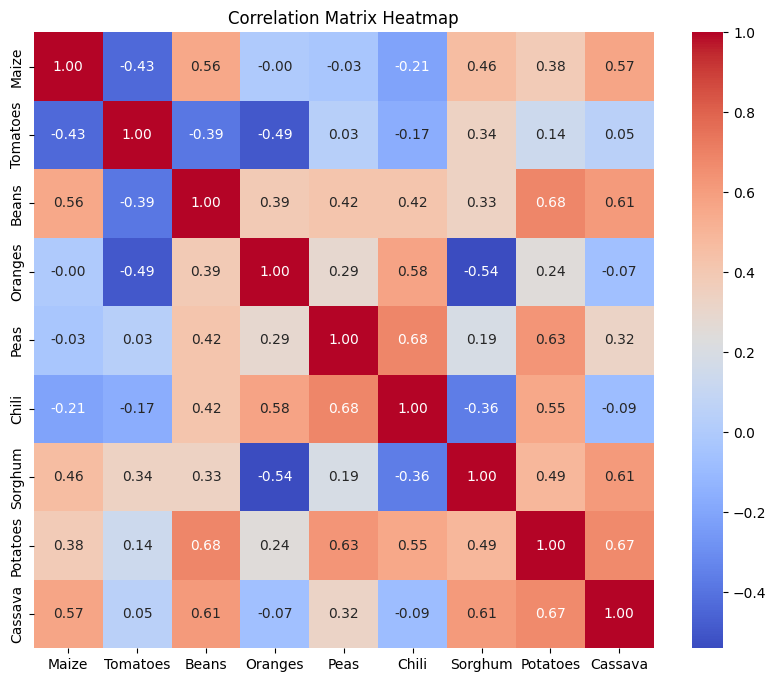

In [34]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#Task 5: Forecasting for the Next 6 Months

In [35]:
# Calculate 3-month and 6-month moving averages
combined_df['Tomatoes_MA_3'] = combined_df['Tomatoes'].rolling(window=3).mean().shift(1)
combined_df['Tomatoes_MA_6'] = combined_df['Tomatoes'].rolling(window=6).mean().shift(1)

In [36]:
# Forecast dates for the next 6 months
last_date = combined_df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=7, freq='MS')[1:]  # Next 6 months

# Get the last values of the moving averages
last_ma_3 = combined_df['Tomatoes_MA_3'].iloc[-1]
last_ma_6 = combined_df['Tomatoes_MA_6'].iloc[-1]

# Create a DataFrame for the forecasted moving averages
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Tomatoes_MA_3': [last_ma_3] * len(forecast_dates),
    'Tomatoes_MA_6': [last_ma_6] * len(forecast_dates)
}).set_index('Date')

# Combine with the original DataFrame
combined_forecast_df = pd.concat([combined_df, forecast_df])

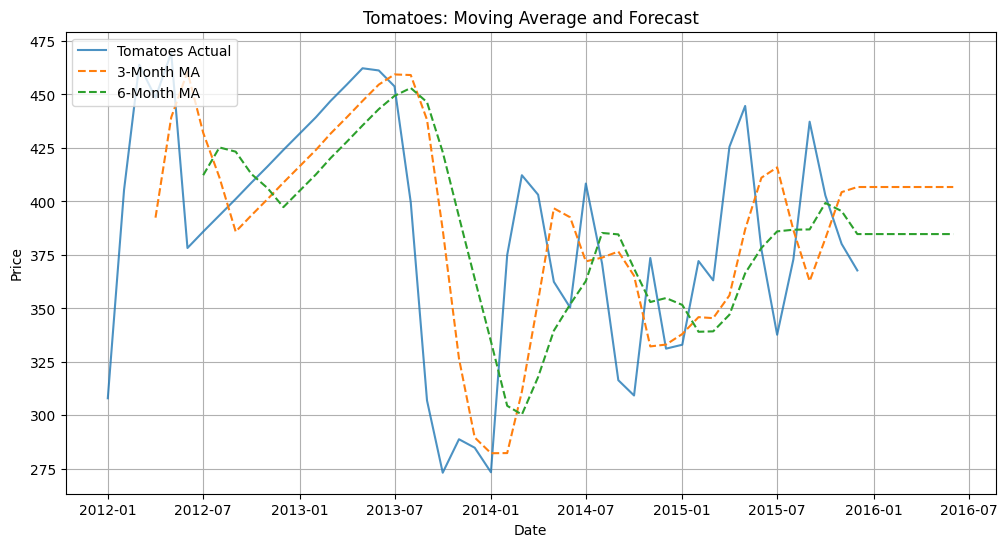

In [37]:
import matplotlib.pyplot as plt

# Plot actual data and moving averages with forecasts
plt.figure(figsize=(12, 6))
plt.plot(combined_forecast_df.index, combined_forecast_df['Tomatoes'], label='Tomatoes Actual', alpha=0.8)
plt.plot(combined_forecast_df.index, combined_forecast_df['Tomatoes_MA_3'], label='3-Month MA', linestyle='--')
plt.plot(combined_forecast_df.index, combined_forecast_df['Tomatoes_MA_6'], label='6-Month MA', linestyle='--')

# Add title and labels
plt.title('Tomatoes: Moving Average and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q628jcd/bx70dd0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q628jcd/sh1gjtg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36354', 'data', 'file=/tmp/tmp_q628jcd/bx70dd0k.json', 'init=/tmp/tmp_q628jcd/sh1gjtg_.json', 'output', 'file=/tmp/tmp_q628jcd/prophet_modelilg132h7/prophet_model-20241129043345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:33:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
96  2016-01-01  270.892125  214.585037  317.398271
97  2016-02-01  373.916411  322.275883  423.825016
98  2016-03-01  394.723598  342.873328  445.191834
99  2016-04-01  381.659920  332.119005  433.340192
100 2016-05-01  401.027293  351.572308  450.669561
101 2016-06-01  360.236855  311.201519  408.737434


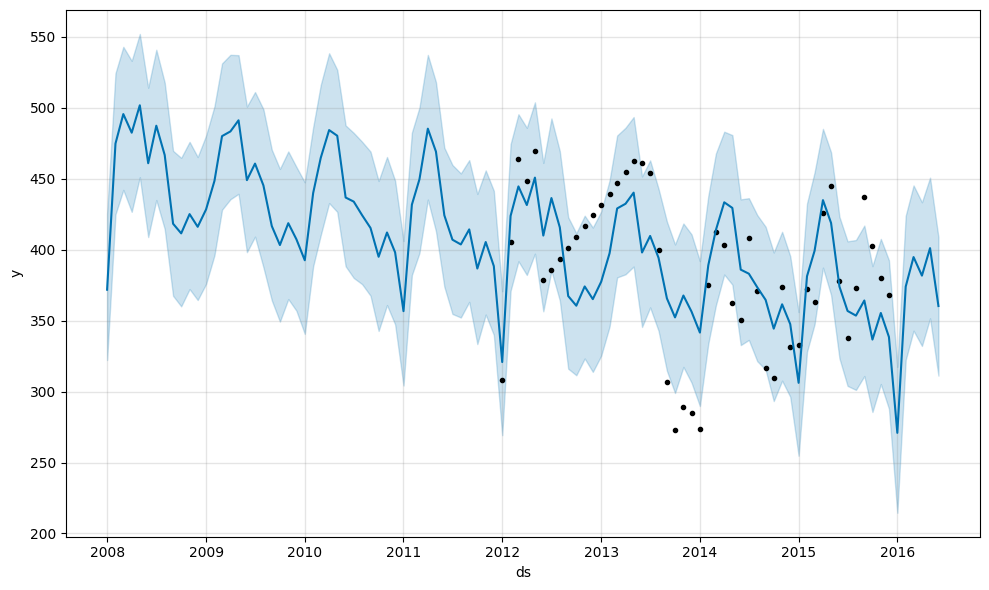

In [38]:
# prompt: Facebook Prophet
# Prepare the data for Prophet by converting it to the required format
# (columns: ds for date and y for values).
# Fit a Prophet model and forecast the next 6 months.

from prophet import Prophet

# Prepare the data for Prophet
prophet_df = combined_df[['Tomatoes']].reset_index()
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create future dates for forecasting
future = model.make_future_dataframe(periods=6, freq='MS')

# Make predictions
forecast = model.predict(future)

# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

# Plot the forecast
fig1 = model.plot(forecast)

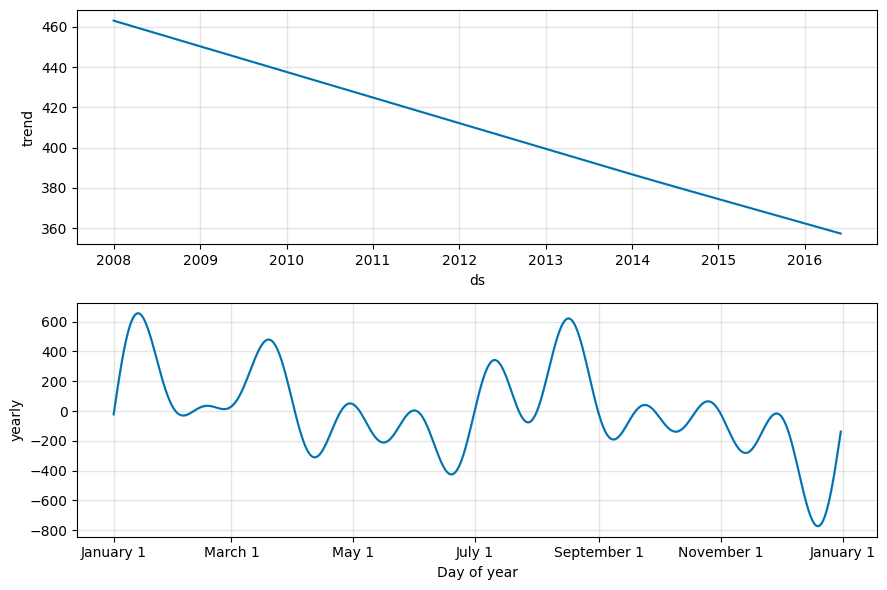

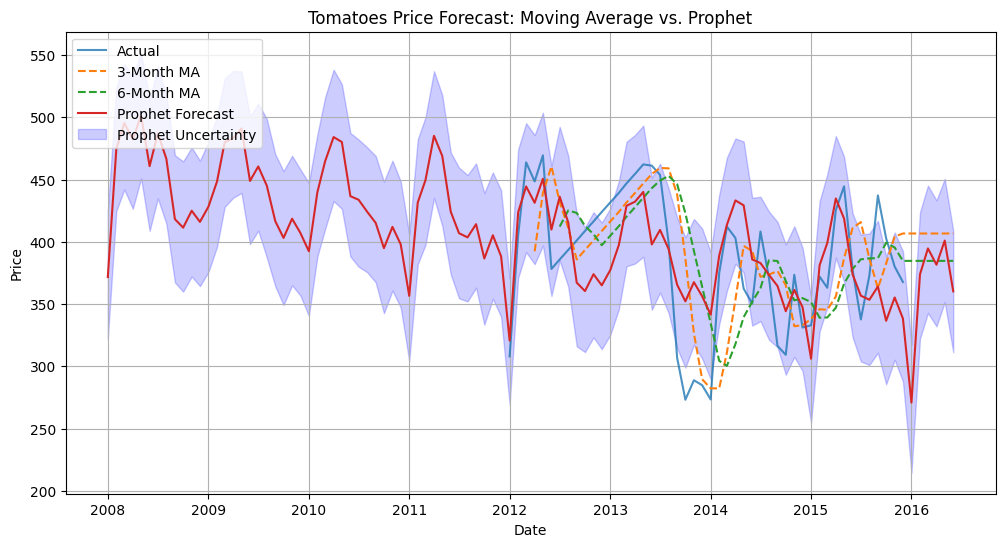

In [39]:
# prompt: Visualize the forecasted results for all two methods alongside the actual
# time series.

# Plot the forecast components
fig2 = model.plot_components(forecast)

# Plotting the actual time series, moving average forecasts, and Prophet forecast
plt.figure(figsize=(12, 6))

# Actual time series
plt.plot(combined_forecast_df.index, combined_forecast_df['Tomatoes'], label='Actual', alpha=0.8)

# Moving average forecasts
plt.plot(combined_forecast_df.index, combined_forecast_df['Tomatoes_MA_3'], label='3-Month MA', linestyle='--')
plt.plot(combined_forecast_df.index, combined_forecast_df['Tomatoes_MA_6'], label='6-Month MA', linestyle='--')

# Prophet forecast
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', linestyle='-')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, color='b', label='Prophet Uncertainty')


plt.title('Tomatoes Price Forecast: Moving Average vs. Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Simple Exponential Smoothing Predictions:
2016-01-01   NaN
2016-02-01   NaN
2016-03-01   NaN
2016-04-01   NaN
2016-05-01   NaN
2016-06-01   NaN
Freq: MS, dtype: float64


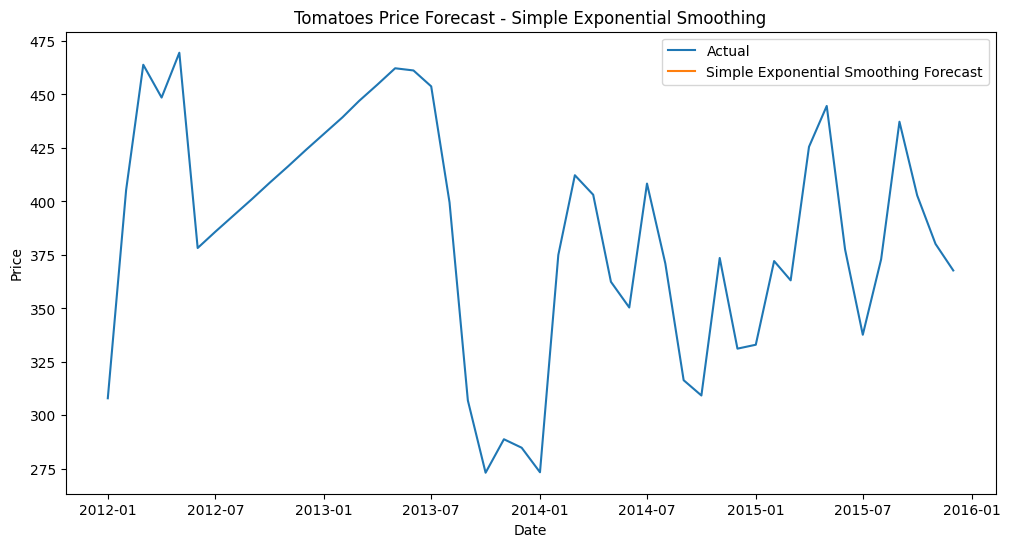

In [40]:
# prompt: Implement the following forecasting methods: Exponential Smoothing
# Apply exponential smoothing methods (Simple)
# and Predict the next 6 months

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'combined_df' is your DataFrame with 'Tomatoes' as a column and 'Date' as the index

# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(combined_df['Tomatoes'])
model_fit = model.fit(smoothing_level=0.2) # Adjust smoothing_level as needed

# Predict the next 6 months
predictions = model_fit.forecast(6)

# Print the predictions
print("Simple Exponential Smoothing Predictions:")
print(predictions)

# Plot the results (optional)
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Tomatoes'], label='Actual')
plt.plot(predictions, label='Simple Exponential Smoothing Forecast')
plt.title('Tomatoes Price Forecast - Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()